In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from skimage.color import rgb2gray
from skimage.transform import rescale, resize, downscale_local_mean
from sklearn.model_selection import train_test_split
from skimage import data, color, feature
from skimage.feature import hog

import glob

In [2]:
def FtrExtractHOG(img):
    # Preprocessing using grayscale and resize
    # img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # img=resize(img, (72, 72),anti_aliasing=True)
    # Feature Extraction using HOG
    ftr,_ = hog(img, orientations=8, pixels_per_cell=(16, 16),
              cells_per_block=(1, 1), visualize=True)
    return ftr

In [3]:
#https://scikit-image.org/docs/stable/api/api.html

In [4]:
def loadimage(arr, n, name_of_fruit):
    label = []
    target_size = (100, 100)
    for i in range(n):
        strr = "rgb/" + name_of_fruit + "_" + str(i + 1) + "/*.png"
        for file in glob.glob(strr):
            img = plt.imread(file)
            # Resize image to target size
            img_resized = resize(img, target_size)
            arr.append(img_resized)
            label.append(name_of_fruit)
    return arr, label


apple = []
banana = []
lemon = []
lime = []
orange = []
peach = []
pear = []

apple, label_apple = loadimage(apple, 5, "apple")
banana, label_banana = loadimage(banana, 4, "banana")
lemon, label_lemon = loadimage(lemon, 6, "lemon")
lime, label_lime = loadimage(lime, 4, "lime")
orange, label_orange = loadimage(orange, 4, "orange")
peach, label_peach = loadimage(peach, 3, "peach")
pear, label_pear = loadimage(pear, 3, "pear")

raw_atribut = {'class': ['Apple', 'Banana', 'Lemon', 'Lime', 'Orange', 'Pear', 'Peach'],
               'amount': [np.shape(apple)[0], np.shape(banana)[0], np.shape(lemon)[0], np.shape(lime)[0], np.shape(orange)[0], np.shape(peach)[0], np.shape(pear)[0]]}
atribut = pd.DataFrame(raw_atribut,
                       columns=['class', 'amount'])
atribut

,class,amount
0,Apple,3098
1,Banana,2826
2,Lemon,3747
3,Lime,2514
4,Orange,2834
5,Pear,2082
6,Peach,2026


Contoh Dataset


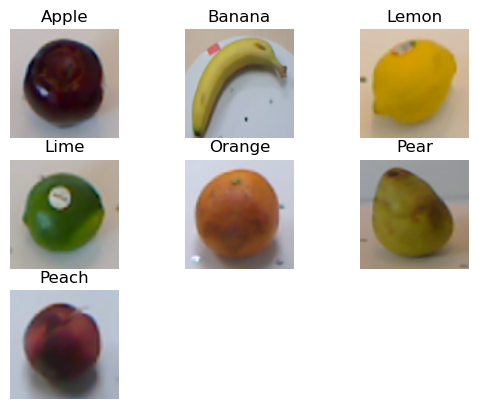

In [15]:
print('Contoh Dataset')
fig = plt.figure()
ax1 = fig.add_subplot(3,3,1)
ax1.set_title('Apple')
ax1.set_axis_off()
ax1.imshow(apple[0])

ax2 = fig.add_subplot(3,3,2)
ax2.set_title('Banana')
ax2.set_axis_off()
ax2.imshow(banana[0])

ax3 = fig.add_subplot(3,3,3)
ax3.set_title('Lemon')
ax3.set_axis_off()
ax3.imshow(lemon[0])

ax4 = fig.add_subplot(3,3,4)
ax4.set_title('Lime')
ax4.set_axis_off()
ax4.imshow(lime[0])

ax5 = fig.add_subplot(3,3,5)
ax5.set_title('Orange')
ax5.set_axis_off()
ax5.imshow(orange[0])

ax6 = fig.add_subplot(3,3,6)
ax6.set_title('Pear')
ax6.set_axis_off()
ax6.imshow(pear[0])

ax7 = fig.add_subplot(3,3,7)
ax7.set_title('Peach')
ax7.set_axis_off()
ax7.imshow(peach[0])

In [5]:
total_x = np.concatenate((apple, banana, lemon, lime, orange, pear, peach))
total_y = np.concatenate((label_apple, label_banana, label_lemon, label_lime, label_orange, label_pear, label_peach))

x_train,  x_test, y_train, y_test = train_test_split(total_x, total_y, test_size=0.33, random_state=42)

print('training_amount :', x_train.shape[0])
print('testing_amount :', x_test.shape[0])

training_amount : 12815
testing_amount : 6312


In [6]:
def preProcessing(arr):
    arr_pre = []
    for i in range(np.shape(arr)[0]):
        img = cv2.cvtColor(arr[i], cv2.COLOR_BGR2GRAY)
        resize_img = resize(img, (72, 72), anti_aliasing=True)
        arr_pre.append(resize_img)
    return arr_pre

In [7]:
x_train_pre = preProcessing(x_train)
x_test_pre = preProcessing(x_test)

print('Finish preprocessing')

Finish preprocessing


In [8]:
def featureExtraction1(arr):
    arr_feature=[]
    for i in range(np.shape(arr)[0]):
        arr_feature.append(FtrExtractHOG(arr[i]))
    return arr_feature

In [9]:
x_train_feature = featureExtraction1(x_train_pre)
x_test_feature = featureExtraction1(x_test_pre)

print ('Finish featureExtraction')

Finish featureExtraction


In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=11)
knn_clf.fit(x_train_feature, y_train)
print('training finish')

training finish


In [14]:
y_knn_predict = knn_clf.predict(x_test_feature)
print('accuary :', accuracy_score(y_test, y_knn_predict)*100,'%')
print('predict finish')

accuary : 99.88910012674272 %
predict finish


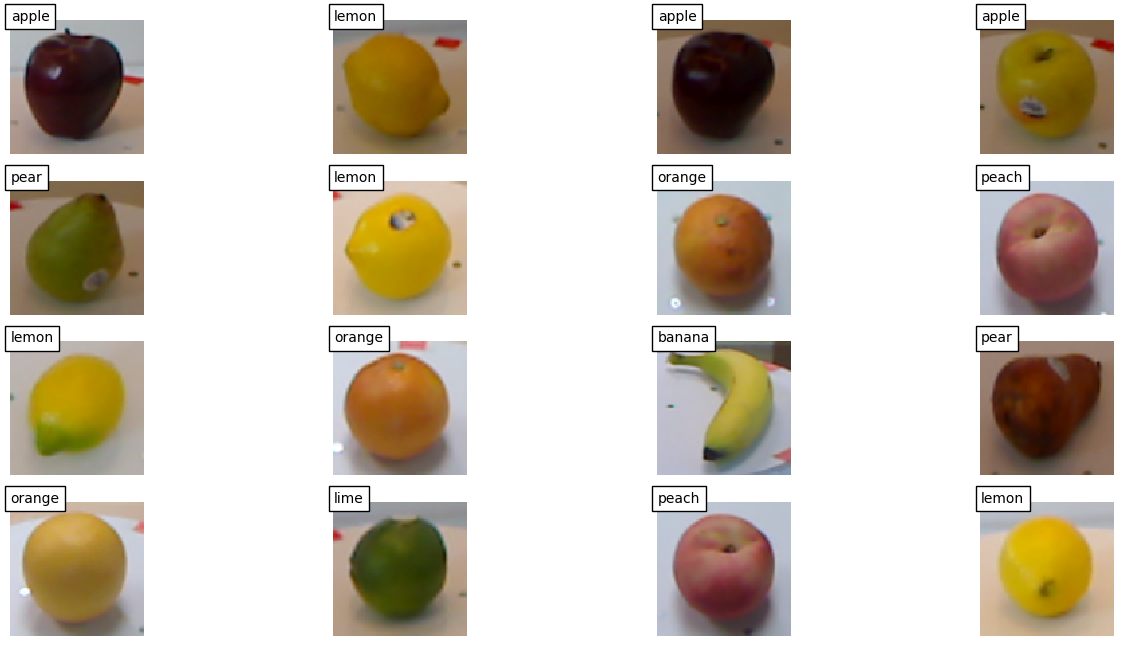

In [15]:
slice = 16 
plt.figure(figsize=(16,8))
for i in range(slice):
    plt.subplot(4, 4, i+1)
    plt.imshow(x_test[i], interpolation='nearest')
    plt.text(0, 0, y_knn_predict[i], color='black', 
             bbox=dict(facecolor='white', alpha=1))
    plt.axis('off')

In [16]:
# import pickle as pk 
# filename = 'mymodel.sav'
# pk.dump(knn_clf, open(filename, 'wb'))
# print('mymodel saving finish')

In [ ]:
filename = 'mymodel.sav'
model = pk.load(open(filename, 'rb'))
predict_y = model.predict(x_test_feature)
print('accuary :', accuracy_score(y_test, predict_y)*100,'%')
